# Surrogate model using gaussian process and use of uncertainity to actively search the samples to make better fit model with minimum number of samples. 

Steps of execution: 
  1. Initialise: Started with a prior (here we started with GP with mean 0 and some epsilon variance.) 
  2. Observe data: started with one sample in the region of interest in sample space (our sample space is 1D 0-10 ) 
                   Initial observed data here is 1.0 
  3. Estimate Posterior. 
  4. Predict using posterior distribution. 
  5. Find the region of maximum variance 
  6. Sample in that region 
  7. Use earlier posterior as prior and go to step3 
   keep running loop between step 3 to 7 until uncertainity reaches below the desirable level(given by user). 
   
  Final model is GP(mean, variance) 



In [10]:
import sklearn.gaussian_process as gp
from sklearn.gaussian_process import GaussianProcessRegressor
import numpy as np
from matplotlib import pyplot as plt
import matplotlib;matplotlib.rcParams['figure.figsize'] = (8,5)
import time
#%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

1. Select the kernel. here we are using Radial basis function ( with length scale : 1.5) 
2. Select intial sample point. Here, we selcted only one sample in range of 0-10 and it is 1.0
3. Select test points

In [11]:
kernel =  gp.kernels.RBF(1.5);
X = [1] ;  # intial sample ( only one)
x = np.atleast_2d(np.linspace(0, 6.28, 50)).T   # test points

This is the function that we want to predict. 
   f(x) = sin(x)  
Our range of interset is between 0-2*pi

In [12]:
def f(x):
    """The function to predict."""
    return np.sin(x)

Current sample points are: [1]
Current sample points are: [1.   6.28]
Current sample points are: [1.         6.28       3.58857143]
Current sample points are: [1.         6.28       3.58857143 0.        ]
Current sample points are: [1.         6.28       3.58857143 0.         4.99836735]
Current sample points are: [1.         6.28       3.58857143 0.         4.99836735 2.30693878]


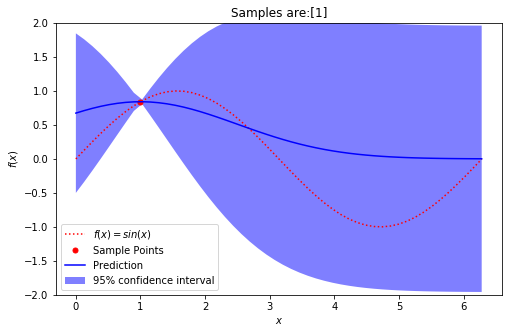

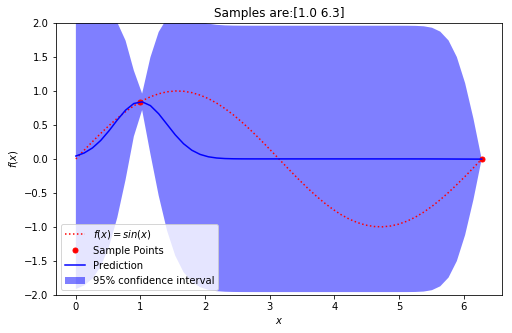

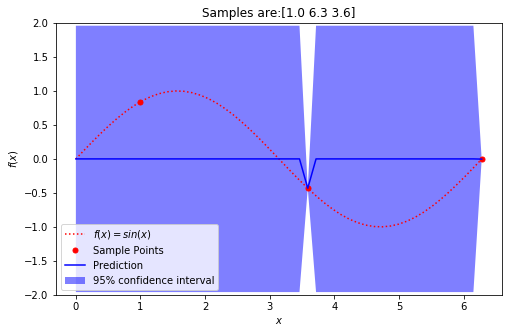

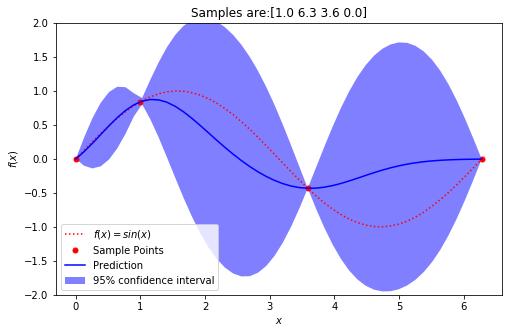

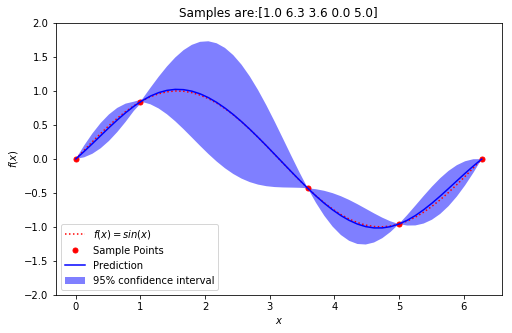

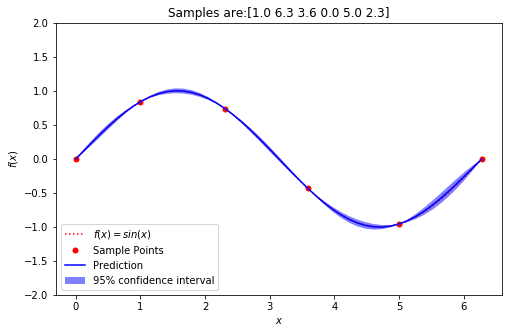

In [13]:
sigma=np.array([1, 1]) 
while np.amax(sigma) >0.1 :
#  First the noiseless case
 #print('I am in while loop')
 print('Current sample points are:', X)
 X = np.atleast_2d(X).T
 #print('X is',X)
 # Observations
 y = f(X).ravel()
 #print('y is',y)
 
 gpp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
 gpp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
 y_pred, sigma = gpp.predict(x, return_std=True)

#print('std deviation is:',sigma)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
 plt.figure()
 plt.plot(x, f(x), 'r:', label=r'$f(x) =sin(x)$')
 plt.plot(X, y, 'r.', markersize=10, label='Sample Points')
 plt.plot(x, y_pred, 'b-', label='Prediction')
 plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
 plt.xlabel('$x$')
 plt.ylabel('$f(x)$')
 plt.ylim(-2, 2)
 plt.legend(loc='lower left')
 X=X.flatten()
 plt.title('Samples are:'+np.array2string(X, formatter={'float_kind':lambda X: "%.1f" % X}))

 #print('std deviation is:',sigma)
 #print('preiction points are:',x.ravel())
 position=np.where(sigma==np.amax(sigma))
 #print('postions to append are:',position)
 X=np.append(X,x[position[0][0]])
 time.sleep(5)

As GP is a distribution over function parameterised by the mean function and variance function. Here, our final model's mean is function passing represented by blue line and varaince is outer boundary of blue area. 

The above process actively searches for maximum standard deviation region and sample from that region and run the approximation process. The process ends when the it finds the desired accuracy in surrogate GP model provided by user. 
 Here I gave termination criteria when maximum variance is between "desired+0.1/-0.1". But other parameters can also be used. 
 This is just one demonstration of power of GP. There are another better optimisation for active searching.  